In [ ]:
from DEQ_utils import create_DEQ_model
from deepinv.loss.metric import PSNR,SSIM,LPIPS
from DNCNN import DnCNN
from deepinv.physics import GaussianNoise
from deepinv.utils import plot
import torch

/opt/miniconda3/lib/python3.13/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
if torch.backends.mps.is_available():
    device = torch.device("mps")
    print("Utilizzo della GPU Apple con Metal backend.")
else:
    device = torch.device("cpu")
    print("MPS device non trovato, utilizzo la CPU.")

Utilizzo della GPU Apple con Metal backend.


In [3]:
string='Motion_7'
reg='RED'
alpha=100
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model,_=create_DEQ_model(device,alpha,string,reg)

torch.Size([1, 3, 256, 256])
tensor(0.0100) tensor(1.4500)
tensor(0.0511) tensor(1.0417)


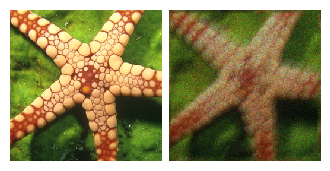

In [4]:
from DEQ_utils import create_operator
from deepinv.utils import plot
from Utils import create_image_tensor,add_poisson_noise
physics=create_operator(device,string)
images_path='/Users/christiandaniele/Desktop/DEQ-MD/DEQs/set3c'
set3c_im=create_image_tensor(images_path,device=device)
butterfly=set3c_im[0:1]
print(butterfly.shape)
mes=add_poisson_noise(physics(butterfly),alpha)
print(torch.min(mes),torch.max(mes))
print(torch.min(physics.A_adjoint(mes)),torch.max(physics.A_adjoint(mes)))
plot([butterfly,mes])

In [5]:
rec,psnr_vett,residuals,stepsize_vett,fun_values=model(mes,GT=butterfly)

Iteration 2, active elements: 1
Iteration 3, active elements: 1
Iteration 4, active elements: 1
Iteration 5, active elements: 1
Iteration 6, active elements: 1
Iteration 7, active elements: 1
Iteration 8, active elements: 1
Iteration 9, active elements: 1
Iteration 10, active elements: 1
Iteration 11, active elements: 1
Iteration 12, active elements: 1
Iteration 13, active elements: 1
Iteration 14, active elements: 1
Iteration 15, active elements: 1
Iteration 16, active elements: 1
Iteration 17, active elements: 1
Iteration 18, active elements: 1
Iteration 19, active elements: 1
Iteration 20, active elements: 1
Iteration 21, active elements: 1
Iteration 22, active elements: 1
Iteration 23, active elements: 1
Iteration 24, active elements: 1
Iteration 25, active elements: 1
Iteration 26, active elements: 1
Iteration 27, active elements: 1
Iteration 28, active elements: 1
Iteration 29, active elements: 1
Iteration 30, active elements: 1
Iteration 31, active elements: 1
Iteration 32, acti

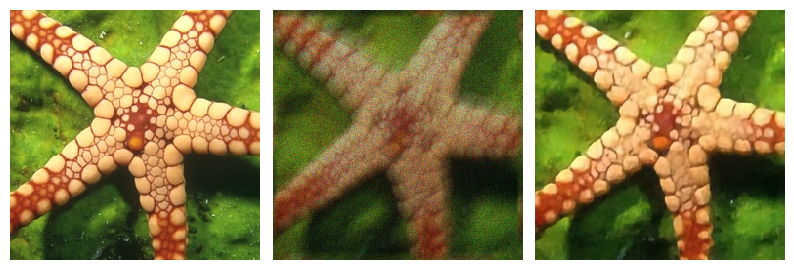

PSNR: tensor([25.1648])
SSIM: tensor([0.7418])
tensor(25.1648)
tensor(0.0404) tensor(1.)
tensor(0.) tensor(1.)
tensor(0.0100) tensor(1.4500)


In [8]:
plot([butterfly,mes,rec],figsize=(10,4))
psnr=PSNR()
ssim=SSIM()
print('PSNR:',psnr(rec,butterfly))
print('SSIM:',ssim(rec,butterfly))
print(torch.mean(psnr(rec,butterfly)))
print(torch.min(rec),torch.max(rec))
print(torch.min(butterfly),torch.max(butterfly))
print(torch.min(mes),torch.max(mes))

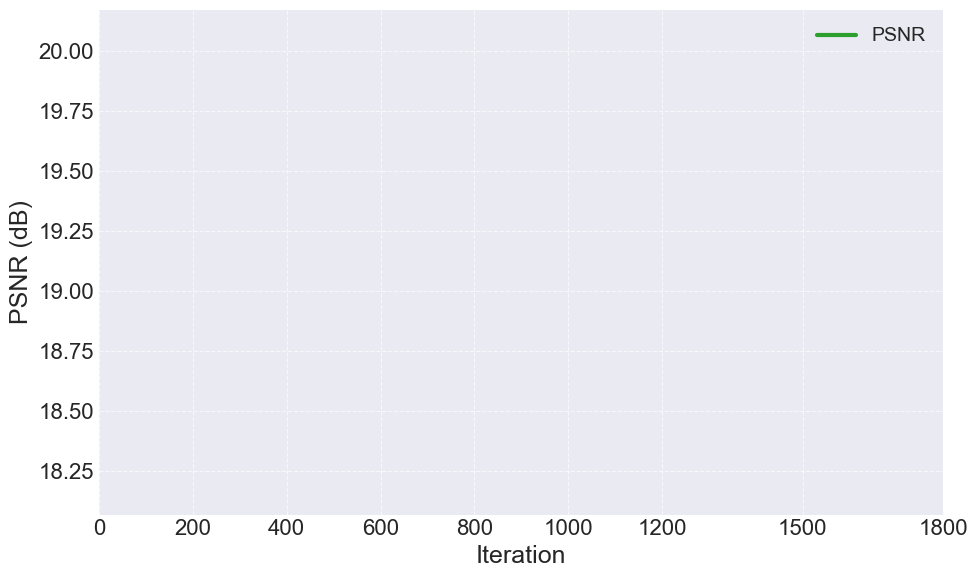

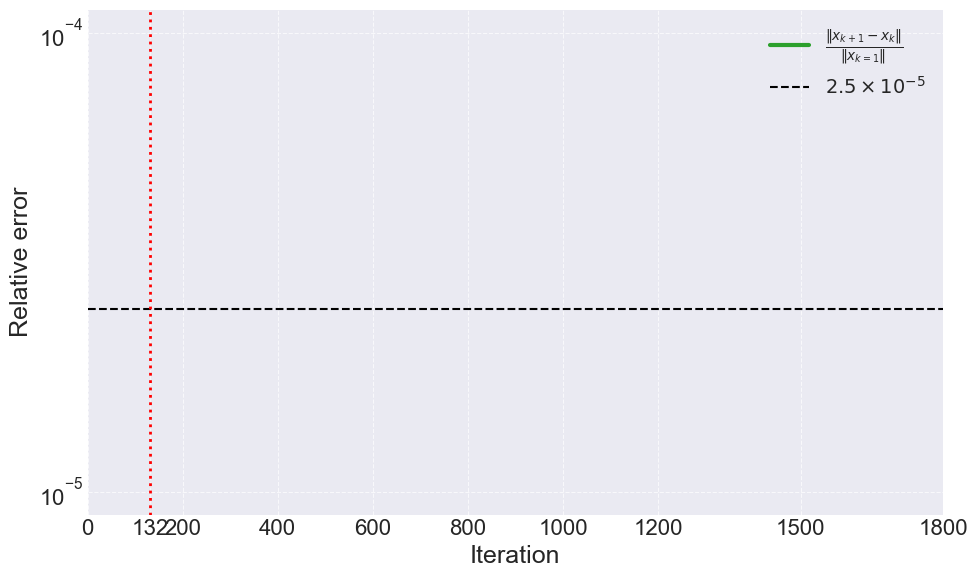

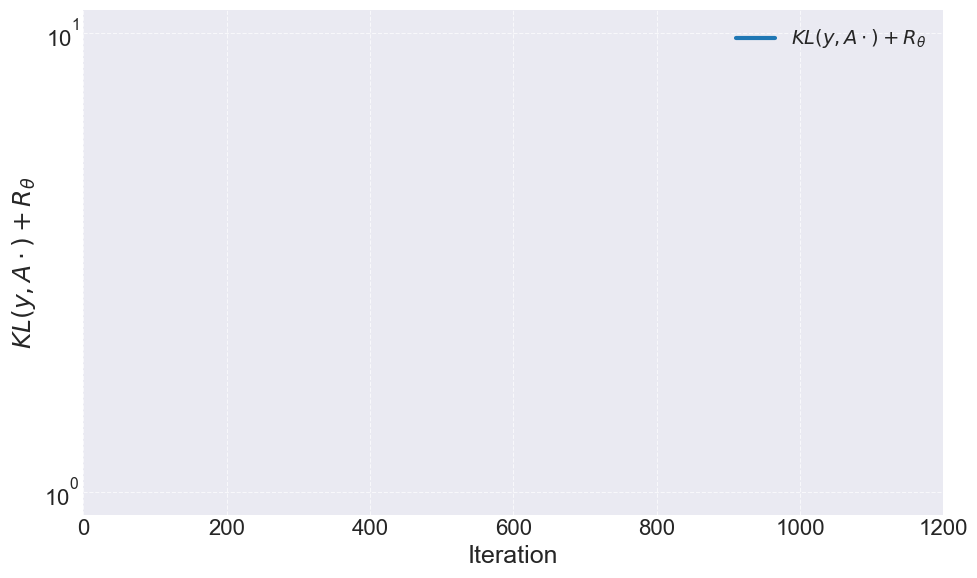

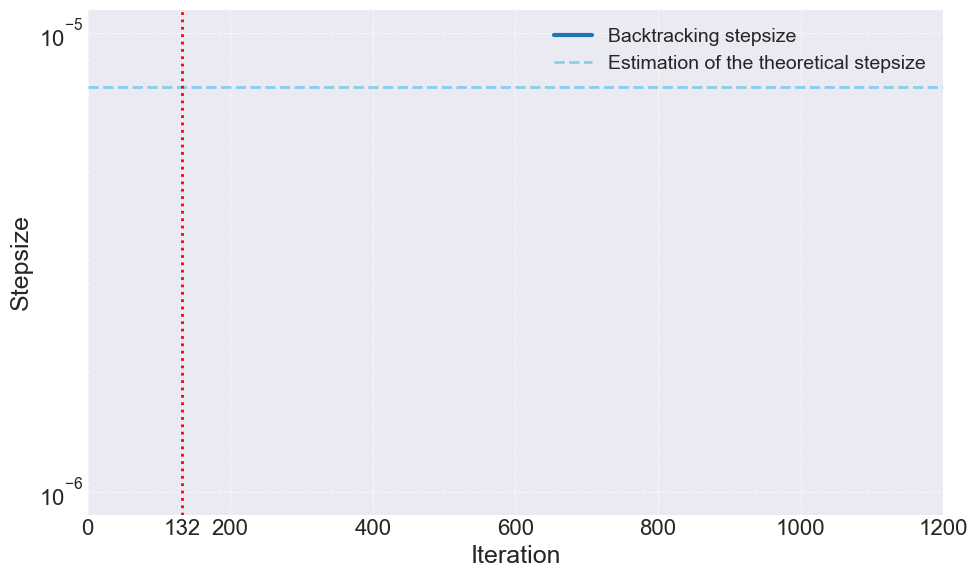

In [9]:
import matplotlib.pyplot as plt

psnr_1=psnr_vett
current_xticks = [0,200,400,600,800,1000,1200,1500,1800]
# --- Parametri Globali per tutti i plot ---
plt.style.use('seaborn-v0_8-darkgrid') # Stile per la griglia e l'aspetto generale
# Imposta i parametri di default per i font
plt.rcParams['font.size'] = 14 # Dimensione base del font per tutto
plt.rcParams['axes.titlesize'] = 20 # Dimensione del titolo degli assi (titolo del grafico)
plt.rcParams['axes.labelsize'] = 18 # Dimensione delle etichette degli assi (X e Y)
plt.rcParams['xtick.labelsize'] = 16 # Dimensione delle tick labels sull'asse X
plt.rcParams['ytick.labelsize'] = 16 # Dimensione delle tick labels sull'asse Y
plt.rcParams['legend.fontsize'] = 14 # Dimensione del font della legenda
plt.rcParams['lines.linewidth'] = 3# Larghezza della linea di default
plt.rcParams['lines.markersize'] = 5 # Dimensione dei marker di default
# Funzione per applicare lo stile comune agli assi
def apply_common_style(ax):
    ax.grid(True, linestyle='--', alpha=0.7) # Abilita la griglia
    ax.tick_params(axis='both', which='major', labelsize=plt.rcParams['xtick.labelsize']) # Applica la dimensione delle tick labels
    ax.spines['top'].set_visible(False) # Nasconde la spina superiore
    ax.spines['right'].set_visible(False) # Nasconde la spina destra
    if ax.get_legend_handles_labels()[1]: # Mostra la legenda solo se ci sono etichette
        ax.legend()
    plt.tight_layout() # Ottimizza il layout
# --- Plot 1: PSNR w.r.t Ground Truth along iterations ---
# Assumi che psnr_1 sia già definito, es:
# psnr_1 = np.random.rand(50) * 10 + 20 # Esempio di dati
fig1, ax1 = plt.subplots(figsize=(10, 6))
ax1.plot(psnr_1, linestyle='-', color='#2CA02C', label='PSNR')
ax1.set_xlabel("Iteration")
ax1.set_ylabel("PSNR (dB)")
ax1.set_xticks(current_xticks)
apply_common_style(ax1)
# --- Plot 2: Relative Error along iterations ---
# Assumi che fun_res sia già definito, es:
# fun_res = 10**(-np.linspace(1, 10, 50)) # Esempio di dati
fun_res = residuals
fig2, ax2 = plt.subplots(figsize=(10, 6))
ax2.semilogy(fun_res, linestyle='-',color='#2CA02C', label=r"$\frac{\|x_{k+1}-x_{k}\|}{\|x_{k=1}\|}$")
ax2.axhline(y=2.5e-5, color='black', linestyle='--', linewidth=1.5, label=r'$2.5 \times 10^{-5}$')
ax2.set_xlabel("Iteration")
ax2.set_ylabel('Relative error')
ax2.set_xticks(current_xticks)
vertical_line_x_value = 132 # Il valore sull'asse X dove vuoi la linea
ax2.axvline(x=vertical_line_x_value, color='red', linestyle=':', linewidth=2)
if vertical_line_x_value not in current_xticks:
    current_xticks.append(vertical_line_x_value)
    current_xticks.sort() # Ordina i tick per visualizzazione corretta
    ax2.set_xticks(current_xticks)
apply_common_style(ax2)
# --- Plot 3: Objective Function Value along iterations ---
# Assumi che fun_vals e valori_x_righe siano definiti, es:
# fun_vals = 10**(-np.linspace(0, 5, 50)) + 0.1 # Esempio di dati
# valori_x_righe = [20, 40]
fig3, ax3 = plt.subplots(figsize=(10, 6))
ax3.semilogy(fun_values, linestyle='-', color='#1F77B4', label=r"$KL(y,A\cdot) + R_{\theta}$")
# Per le tick della x, assicurati che `valori_x_righe` sia definito e contenga numeri
# Se non hai questi valori, puoi commentare queste righe
current_xticks = [0,200,400,600,800,1000,1200]
ax3.set_xlabel("Iteration")
ax3.set_ylabel(r"$KL(y,A\cdot) + R_{\theta}$")
ax3.set_xticks(current_xticks)
apply_common_style(ax3)
# --- Plot 4: Stepsize Evolution along iterations ---
# Assumi che L_vett sia definito, es:
# L_vett = np.linspace(100, 500, 50) # Esempio di dati per L_vett
stepsize = stepsize_vett
fig4, ax4 = plt.subplots(figsize=(10, 6))
ax4.semilogy(stepsize, color='#1F77B4', linestyle='-', label='Backtracking stepsize')
constant_value = 1 / (256**2) * 0.5 # Assumendo un valore per 256**2 se è una costante
ax4.axhline(y=constant_value, color='skyblue', linestyle='--', linewidth=2, label=r'Estimation of the theoretical stepsize')
vertical_line_x_value = 132 # Il valore sull'asse X dove vuoi la linea
ax4.axvline(x=vertical_line_x_value, color='red', linestyle=':', linewidth=2)
# Per le tick della x
current_xticks = [0,200,400,600,800,1000,1200]
if vertical_line_x_value not in current_xticks:
    current_xticks.append(vertical_line_x_value)
    current_xticks.sort() # Ordina i tick per visualizzazione corretta
    ax4.set_xticks(current_xticks)
ax4.set_xlabel("Iteration")
ax4.set_ylabel("Stepsize")
apply_common_style(ax4)
# Mostra tutti i grafici
plt.show()



